Water Quality Analysis
One of the main areas of research in machine learning is the analysis of water quality. It is also known as water potability analysis because our task here is to understand all the factors that affect water potability and train a machine learning model that can classify whether a specific water sample is safe or unfit for consumption.

For the water quality analysis task, I will be using a Kaggle dataset that contains data on all of the major factors that affect the potability of water. All of the factors that affect water quality are very important, so we need to briefly explore each feature of this dataset before training a machine learning model to predict whether a water sample is safe or unsuitable for consumption. You can download the dataset I’m using for the water quality analysis task from here.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the datasets nameed water.csv
df = pd.read_csv('water.csv')

#read the first 5 rows of the dataset
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
#check the shape of the dataset
df.shape

(3276, 10)

In [4]:
#chek the null values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
#remove the null values
df.dropna(inplace=True)

In [6]:
#check the null values
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

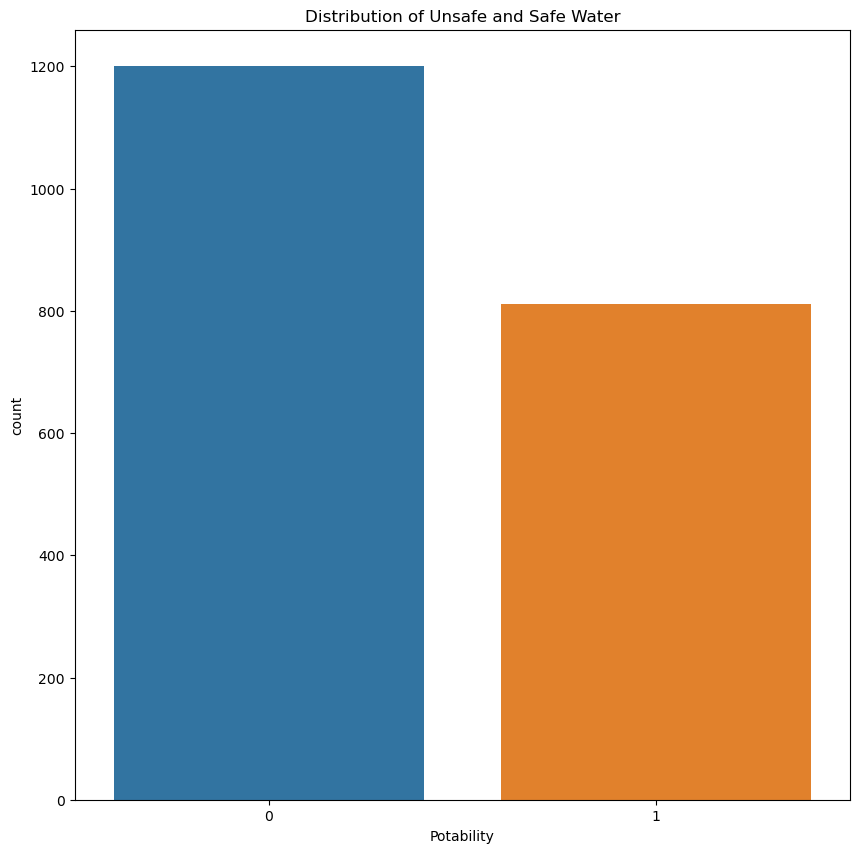

In [9]:
plt.figure(figsize=(10, 10))
sns.countplot(x='Potability', data=df)
plt.title("Distribution of Unsafe and Safe Water")
plt.show()

In [10]:

import plotly.express as px
data = df
figure = px.histogram(data, x = "ph",  color = "Potability", title= "Factors Affecting Water Quality: PH")
figure.show()

In [11]:
figure = px.histogram(data, x = "Sulfate", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Sulfate")
figure.show()

In [12]:
figure = px.histogram(data, x = "Conductivity", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Conductivity")
figure.show()

In [13]:
figure = px.histogram(data, x = "Organic_carbon",  color = "Potability", title= "Factors Affecting Water Quality: Organic Carbon")
figure.show()

In [14]:
figure = px.histogram(data, x = "Hardness", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Hardness")
figure.show()

In [15]:
figure = px.histogram(data, x = "Sulfate", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Sulfate")
figure.show()

In [16]:
figure = px.histogram(data, x = "Conductivity", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Conductivity")
figure.show()

## Water Quality Prediction Model using Python
In the above section, we explored all the features that affect water quality. Now, the next step is to train a machine learning model for the task of water quality analysis using Python. For this task, I will be using the PyCaret library in Python. If you have never used this library before, you can easily install it on your system using the pip command

In [17]:
"""

Before training a machine learning model, 
let’s have a look at the correlation of all
the features with respect to the Potability column in the dataset:
"""

correlation = data.corr()
correlation["ph"].sort_values(ascending=False)

ph                 1.000000
Hardness           0.108948
Organic_carbon     0.028375
Trihalomethanes    0.018278
Potability         0.014530
Conductivity       0.014128
Sulfate            0.010524
Chloramines       -0.024768
Turbidity         -0.035849
Solids            -0.087615
Name: ph, dtype: float64

In [18]:
#check the duplicate values and drop them
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()


0

In [ ]:
# Now below is how you can see which machine learning algorithm is best for this dataset by using the PyCaret library in Python:
from pycaret.classification import *
clf = setup(data, target = "Potability", silent = True, session_id = 786)
compare_models()